In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**1. Loading and Preprocessing**

In [137]:
# Load Dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\CarPrice_Assignment.csv")


In [139]:
# Display basic info
display(df.head())
display(df.info())
display(df.describe())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [141]:
df.shape

(205, 26)

In [143]:
# Checking for Missing Values and Duplicates
print("Missing Values per Column:")
print(df.isnull().sum())
print("\nNumber of Duplicates:", df.duplicated().sum())


Missing Values per Column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Number of Duplicates: 0


There is no duplicates and Missing value in the dataset

In [146]:
# Outlier Detection
numeric_cols = df.select_dtypes(include=['number']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = num_outliers

print("Number of Outliers Before Capping:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Number of Outliers Before Capping:
car_ID: 0
symboling: 0
wheelbase: 3
carlength: 1
carwidth: 8
carheight: 0
curbweight: 0
enginesize: 10
boreratio: 0
stroke: 20
compressionratio: 28
horsepower: 6
peakrpm: 2
citympg: 2
highwaympg: 3
price: 15


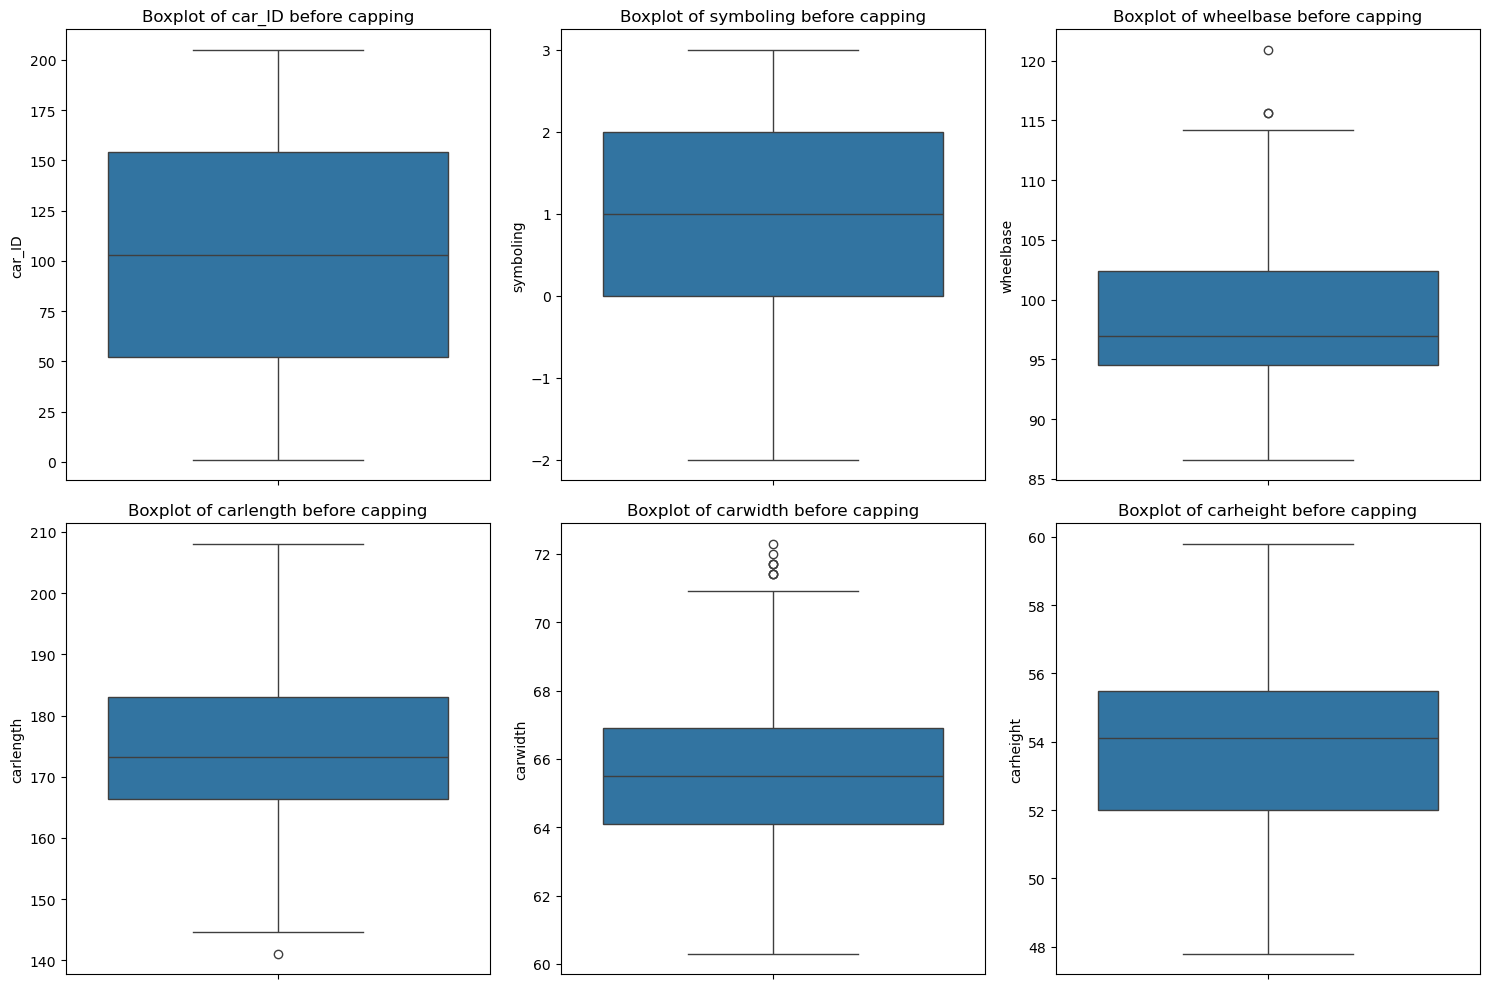

In [148]:
# Visualizing Outliers with Boxplots before capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:6], 1):  # Limiting to first 6 numeric columns for visualization
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} before capping")
plt.tight_layout()
plt.show()

In [150]:
# Applying capping to handle outliers
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

df = cap_outliers(df, numeric_cols)

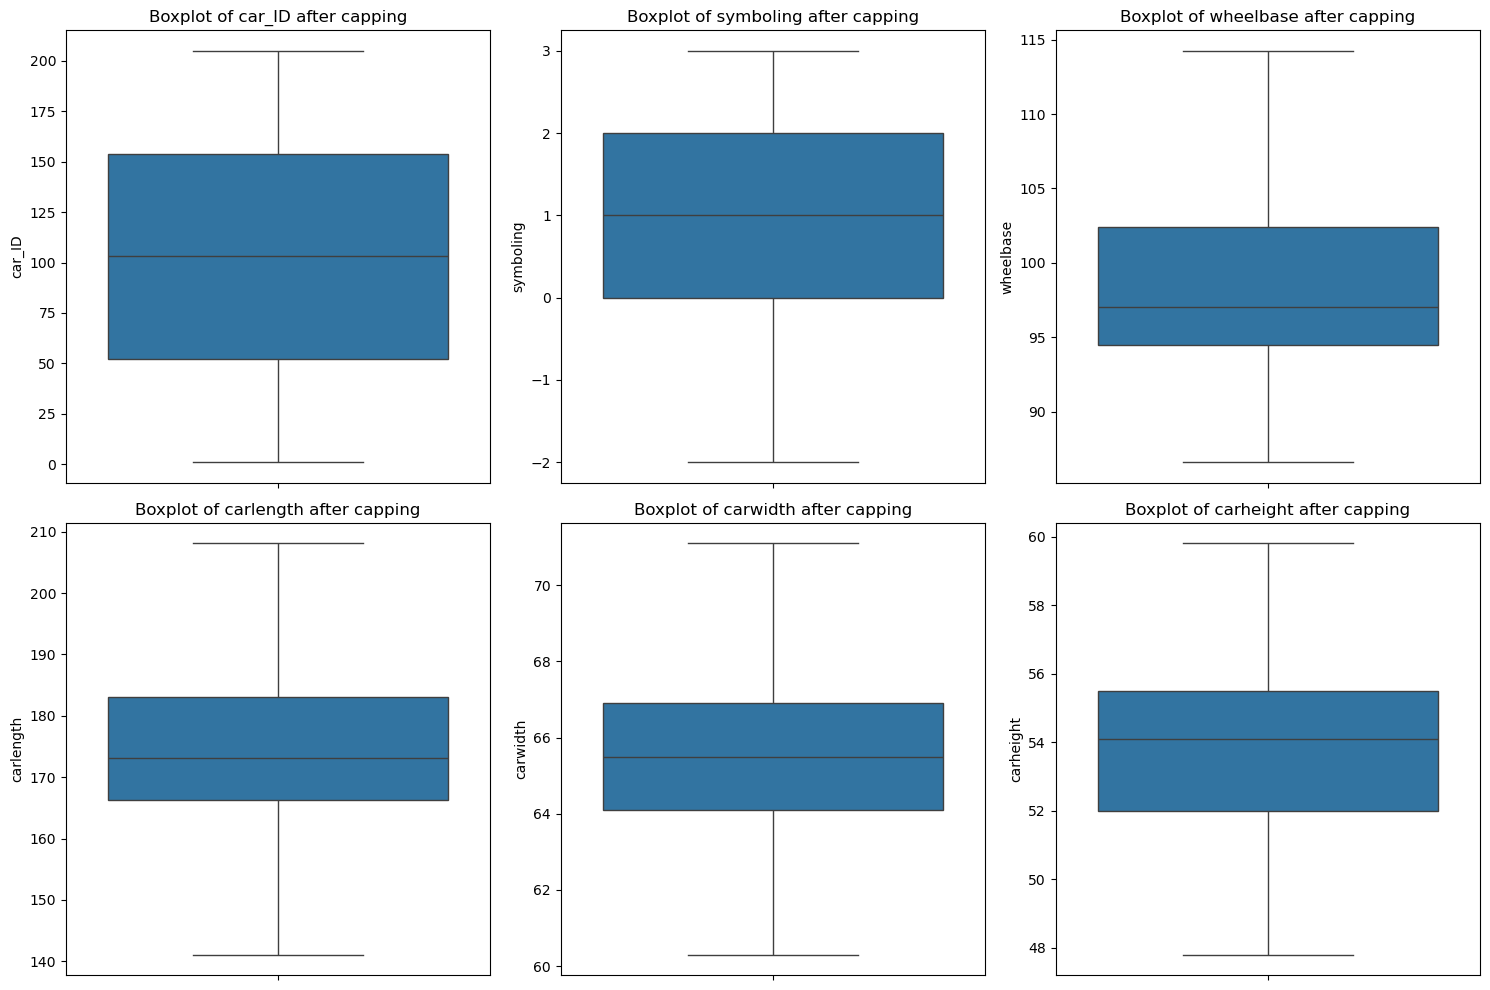

In [152]:
# Visualizing Outliers with Boxplots after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} after capping")
plt.tight_layout()
plt.show()


In [154]:
# Checking Skewness
skewness = df[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness of Numeric Columns:")
print(skewness)



Skewness of Numeric Columns:
price               1.222031
wheelbase           0.924916
enginesize          0.908453
horsepower          0.814957
carwidth            0.776278
curbweight          0.681398
citympg             0.604594
highwaympg          0.347441
symboling           0.211072
carlength           0.155954
carheight           0.063123
peakrpm             0.049935
compressionratio    0.035149
boreratio           0.020156
car_ID              0.000000
stroke             -0.379130
dtype: float64


In [156]:
df_transformed = df.copy()


In [158]:
# Applying transformation if skewness is high (> 0.75)
high_skew_cols = skewness[abs(skewness) > 0.75].index
df_transformed[high_skew_cols] = PowerTransformer(method='yeo-johnson').fit_transform(df_transformed[high_skew_cols])

In [160]:
numeric_cols = df_transformed.select_dtypes(include=['number']).columns
skewness = df_transformed[numeric_cols].skew()
print(skewness)


car_ID              0.000000
symboling           0.211072
wheelbase           0.003159
carlength           0.155954
carwidth            0.000000
carheight           0.063123
curbweight          0.681398
enginesize          0.021314
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.044124
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               0.081616
dtype: float64


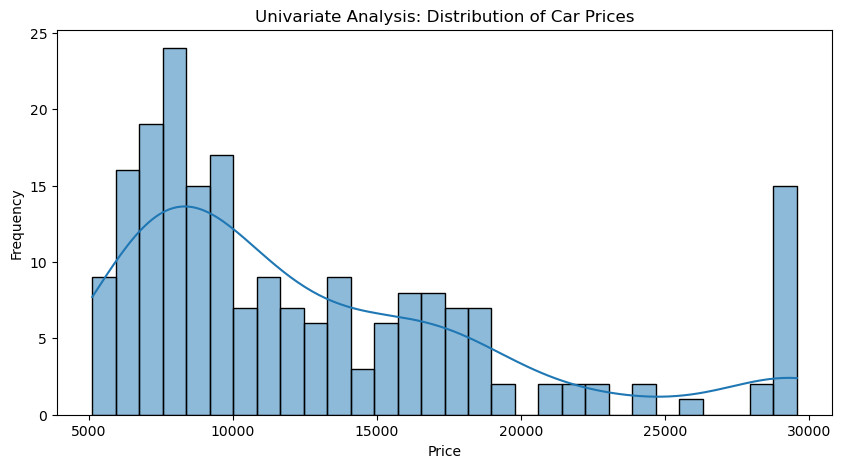

In [162]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Univariate Analysis: Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

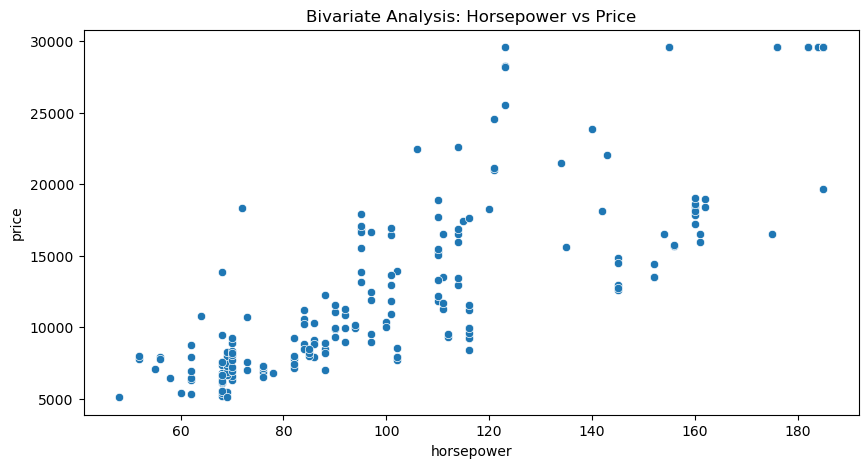

In [164]:
# Bivariate Analysis: Price vs Horsepower
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title("Bivariate Analysis: Horsepower vs Price")
plt.show()

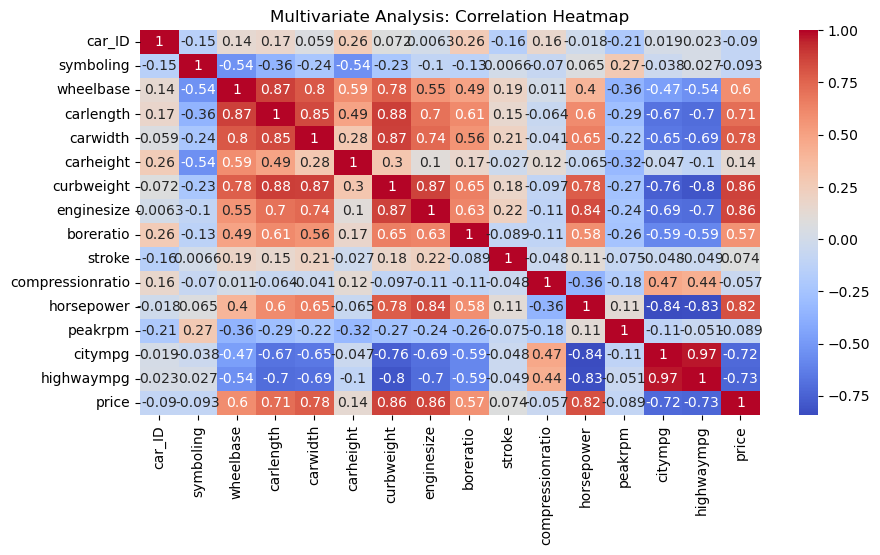

In [166]:
# Multivariate Analysis: Correlation Heatmap (only numeric columns)
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Multivariate Analysis: Correlation Heatmap")
plt.show()



In [168]:
# Encoding categorical data
def preprocess_data(df):
    # Handling categorical variables
    if 'CarName' in df.columns:
        df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0])
        df.drop(['CarName'], axis=1, inplace=True)
    
    label_enc = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = label_enc.fit_transform(df[col])
    
    return df

df = preprocess_data(df)
df_transformed = preprocess_data(df_transformed)

In [170]:
# Feature Selection using SelectKBest
# For df (original dataset)
X = df.drop(columns=['price'])
y = df['price']
k_best = SelectKBest(score_func=f_regression, k=10)
X_new = k_best.fit_transform(X, y)
selected_features = X.columns[k_best.get_support()]
print("Selected Features (Original Data):", selected_features)
df = df[selected_features]
df['price'] = y

Selected Features (Original Data): Index(['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')


In [172]:
# For df_transformed (skewness-handled dataset)
X_trans = df_transformed.drop(columns=['price'])
y_trans = df_transformed['price']
k_best_trans = SelectKBest(score_func=f_regression, k=10)
X_new_trans = k_best_trans.fit_transform(X_trans, y_trans)
selected_features_trans = X_trans.columns[k_best_trans.get_support()]
print("Selected Features (Transformed Data):", selected_features_trans)
df_transformed = df_transformed[selected_features_trans]
df_transformed['price'] = y_trans

Selected Features (Transformed Data): Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')


In [174]:
# Splitting Data
def split_and_scale(df):
    X = df.drop(['price'], axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_and_scale(df)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = split_and_scale(df_transformed)


In [176]:
# Model Implementation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

In [178]:
# Model Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

results_original = {name: evaluate_model(model, X_train, X_test, y_train, y_test) for name, model in models.items()}
results_transformed = {name: evaluate_model(model, X_train_trans, X_test_trans, y_train_trans, y_test_trans) for name, model in models.items()}

print("Results on Original Data:")
display(pd.DataFrame(results_original).T)
print("\nResults on Transformed Data:")
display(pd.DataFrame(results_transformed).T)


Results on Original Data:


,R2 Score,MSE,MAE
Linear Regression,0.849898,7.949651e+06,2190.552140
Decision Tree,0.939342,3.212557e+06,1222.825195
Random Forest,0.961289,2.050196e+06,1045.047882
Gradient Boosting,0.962469,1.987711e+06,1094.654961
Support Vector Regressor,-0.089807,5.771811e+07,5095.456156



Results on Transformed Data:


,R2 Score,MSE,MAE
Linear Regression,0.862339,0.134183,0.304826
Decision Tree,0.929914,0.068315,0.208040
Random Forest,0.935311,0.063055,0.197047
Gradient Boosting,0.932136,0.066150,0.206758
Support Vector Regressor,0.766458,0.227642,0.331084


### Model Performance Comparison

We evaluated five regression models on both the original dataset (`df`) and the transformed dataset (`df_transformed`) using three key metrics:

1. **R-squared (R²)** - Measures how well the model explains variance in the target variable.
2. **Mean Squared Error (MSE)** - Measures the average squared difference between actual and predicted values.
3. **Mean Absolute Error (MAE)** - Measures the average absolute difference between actual and predicted values.

#### **Best Performing Model**
From the results:
- **Gradient Boosting** on the **original dataset** had the highest **R² (0.9624)**, indicating the best fit to the data.
- It also had a **low MSE (1.98M) and MAE (1094.65)**, meaning better error performance.
- **Random Forest** performed similarly but with slightly worse MSE.

On the transformed dataset:
- The **Random Forest model had the highest R² (0.9353)**, but its MSE (0.063) and MAE (0.197) were very close to Gradient Boosting.

#### **Conclusion:**
- If interpretability and computational efficiency matter, **Gradient Boosting on the original data** is the best choice.
- If we prioritize reducing skewness and improving model generalization, **Random Forest on transformed data** is also a strong contender.

Since the transformed dataset improves linear model performance while keeping tree-based models strong, **df_transformed is a better choice for model training.**

**4. Feature Importance Analysis**


Random Forest Feature Importance (Transformed Data):
       Feature  Importance
3  curbweight    0.594752
9  highwaympg    0.195206
4  enginesize    0.079987
7  horsepower    0.060095
0   wheelbase    0.018256
1   carlength    0.018119
8     citympg    0.013556
5  fuelsystem    0.010345
6   boreratio    0.009683
2    carwidth    0.000000

Gradient Boosting Feature Importance (Original Data):
       Feature  Importance
4  curbweight    0.481019
5  enginesize    0.222244
7  horsepower    0.177376
1   wheelbase    0.030973
8     citympg    0.019287
3    carwidth    0.018970
2   carlength    0.017375
0  drivewheel    0.013263
9  highwaympg    0.013119
6   boreratio    0.006374


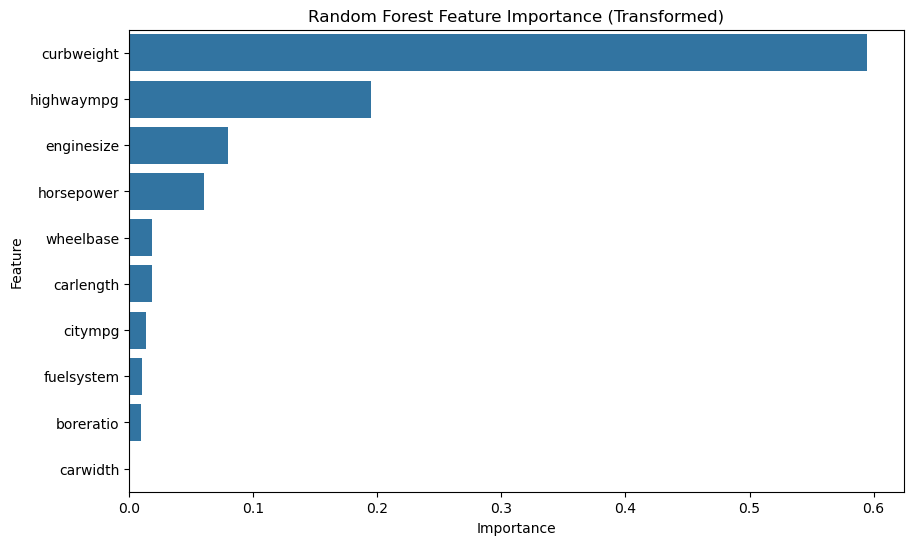

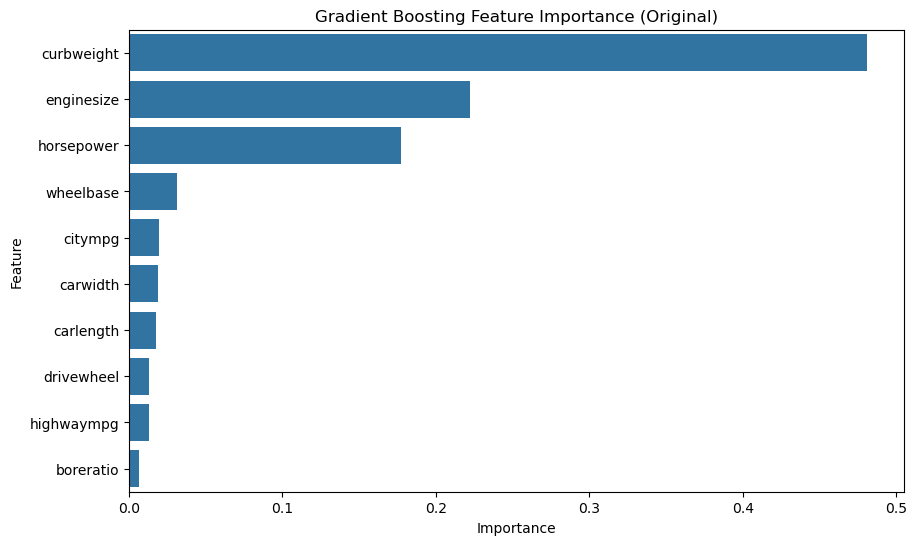

In [191]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


def get_feature_importance(model, X, y):
    model.fit(X, y)
    return pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})\
        .sort_values(by='Importance', ascending=False)

def plot_feature_importance(feature_importance, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(title)
    plt.show()

X_transformed, y_transformed = df_transformed.drop(columns=['price']), df_transformed['price']
X_original, y_original = df.drop(columns=['price']), df['price']

rf_importance = get_feature_importance(RandomForestRegressor(n_estimators=100, random_state=42), X_transformed, y_transformed)
gb_importance = get_feature_importance(GradientBoostingRegressor(n_estimators=100, random_state=42), X_original, y_original)

print("\nRandom Forest Feature Importance (Transformed Data):\n", rf_importance)
print("\nGradient Boosting Feature Importance (Original Data):\n", gb_importance)

plot_feature_importance(rf_importance, "Random Forest Feature Importance (Transformed)")
plot_feature_importance(gb_importance, "Gradient Boosting Feature Importance (Original)")



### **Key Features Affecting Car Prices:**
1. **Curb Weight** – Heavily influences price in both models, indicating that heavier cars tend to be more expensive.
2. **Engine Size** – Plays a crucial role in price determination, as larger engines are generally found in more powerful and expensive cars.
3. **Horsepower** – Affects car price significantly; higher horsepower often leads to higher prices.
4. **Highway MPG** – Important in the Random Forest model, suggesting fuel efficiency can impact pricing.
5. **Wheelbase** – Has a smaller impact but still contributes, possibly reflecting car size and stability.

### **Less Significant Features:**
- **City MPG, Fuel System, Bore Ratio, Car Width, and Drive Wheel** have lower importance and may not have a strong direct effect on price.


In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate model
y_pred = best_rf.predict(X_test)
r2_score_tuned = r2_score(y_test, y_pred)
print("Tuned Random Forest R2 Score:", r2_score_tuned)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest R2 Score: 0.961787263784747
